## HazNERC Statistics

In [ ]:
!git clone https://github.com/ebi-shirinbegi/The-HazNERC.git

Cloning into 'NER-for-Hazaragi-Dialect-'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 35 (delta 17), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (35/35), 882.75 KiB | 7.68 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [ ]:
import os

neTokens = []
neToken = []
with open('NER-for-Hazaragi-Dialect-/train.txt', 'r', encoding='utf-8') as file:
    for line_number, line in enumerate(file.readlines()):
        if line != '\n':
            neToken.append(line.strip().split('\t'))
        else:
            neTokens.append(neToken)
            neToken = []


### Number of Tokens

In [ ]:
len([x for neToken in neTokens for x in neToken ])

201364

#### ORG

In [ ]:
org = [x for neToken in neTokens for x in neToken if 'ORG' in x[1]]
org_count = len(org)
org_count

4406

In [ ]:
import pandas as pd
pd.Series([x[0] for x in org]).nunique()

1663

#### PER

In [ ]:
per = [x for neToken in neTokens for x in neToken if 'PER' in x[1]]
per_count = len(per)
per_count

8349

In [ ]:
pd.Series([x[0] for x in per]).nunique()

3580

#### LOC

In [ ]:
loc = [x for neToken in neTokens for x in neToken if 'LOC' in x[1]]
loc_count = len(loc)
loc_count

5883

In [ ]:
pd.Series([x[0] for x in loc]).nunique()

1742

#### NAT

In [ ]:
nat = [x for neToken in neTokens for x in neToken if 'NAT' in x[1]]
nat_count = len(nat)
nat_count

807

In [ ]:
pd.Series([x[0] for x in nat]).nunique()

300

#### EVE

In [ ]:
eve = [x for neToken in neTokens for x in neToken if 'EVE' in x[1]]
eve_count = len(eve)
eve_count

1015

In [ ]:
pd.Series([x[0] for x in eve]).nunique()

404

####POG

In [ ]:
pog = [x for neToken in neTokens for x in neToken if 'POG' in x[1]]
pog_count = len(pog)
pog_count

506

In [ ]:
pd.Series([x[0] for x in pog]).nunique()

234

#### Summary

In [ ]:
pog_count + eve_count + nat_count + loc_count + per_count + org_count

20966

### Classifications

In [ ]:
!pip install -q transformers

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-fa-base-uncased-clf-persiannews")
model = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-base-uncased-clf-persiannews")
model.eval()
classifier = TextClassificationPipeline(model=model, tokenizer=tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.20M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/651M [00:00<?, ?B/s]

In [ ]:
classifier('دیروز رافتم د بانک مرکزی یک کوت پیسه یشتوم')

[{'label': 'اقتصادی', 'score': 0.9480733275413513}]

In [ ]:
politics_entities = []
economics_entities = []
sports_entities = []
cultural_entities = []
tech_entities = []
inter_entities = []
health_entities = []
society_entities = []

for i, neToken in enumerate(neTokens):
    if i % 100 == 0:
        print(i)
        print('politics_counter  : ', len(politics_entities))
        print('economics_counter : ', len(economics_entities))
        print('sports_counter    : ', len(sports_entities))
        print('cultural_counter  : ', len(cultural_entities))
        print('tech_counter      : ', len(tech_entities))
        print('inter_counter     : ', len(inter_entities))
        print('health_counter    : ', len(health_entities))
        print('society_counter   : ', len(society_entities))

    label = classifier(' '.join([x[0] for x in neToken]))[0]['label']
    if label == 'سیاسی':
        politics_entities.extend(neToken)
    elif label == 'اقتصادی':
        economics_entities.extend(neToken)
    elif label == 'ورزشی':
        sports_entities.extend(neToken)
    elif label == 'فرهنگی هنری':
        cultural_entities.extend(neToken)
    elif label == 'علمی فناوری':
        tech_entities.extend(neToken)
    elif label == 'بین الملل':
        inter_entities.extend(neToken)
    elif label == 'پزشکی':
        health_entities.extend(neToken)
    elif label == 'اجتماعی':
        society_entities.extend(neToken)
    else:
        print(label)


0
politics_counter  :  0
economics_counter :  0
sports_counter    :  0
cultural_counter  :  0
tech_counter      :  0
inter_counter     :  0
health_counter    :  0
society_counter   :  0
100
politics_counter  :  512
economics_counter :  334
sports_counter    :  184
cultural_counter  :  637
tech_counter      :  316
inter_counter     :  236
health_counter    :  228
society_counter   :  410
200
politics_counter  :  936
economics_counter :  565
sports_counter    :  467
cultural_counter  :  1010
tech_counter      :  1062
inter_counter     :  497
health_counter    :  417
society_counter   :  990
300
politics_counter  :  1405
economics_counter :  693
sports_counter    :  788
cultural_counter  :  1776
tech_counter      :  1517
inter_counter     :  611
health_counter    :  568
society_counter   :  1468
400
politics_counter  :  2146
economics_counter :  819
sports_counter    :  1061
cultural_counter  :  2577
tech_counter      :  1702
inter_counter     :  834
health_counter    :  671
society_count

In [ ]:
import pandas as pd

In [ ]:
entity_results = pd.Series([
    len(politics_entities) + len(inter_entities),
    len(economics_entities),
    len(sports_entities),
    len(cultural_entities),
    len(tech_entities),
    len(health_entities),
    len(society_entities)
], index=['سیاسی', 'اقتصادی', 'ورزشی', 'فرهنگ و هنر', 'علمی فناوری', 'پزشکی', 'اجتماعی'])


In [ ]:
entity_results

سیاسی          46621
اقتصادی        14285
ورزشی          17276
فرهنگ و هنر    44188
علمی فناوری    30558
پزشکی          10499
اجتماعی        37937
dtype: int64

In [ ]:
total_count = entity_results.sum()
print("Total number of counted entities:", total_count)

Total number of counted entities: 201364


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
import os

nltk.download('punkt')
corpus_file_path = 'NER-for-Hazaragi-Dialect-/train.txt'

if os.path.exists(corpus_file_path):
    with open(corpus_file_path, 'r', encoding='utf-8') as file:
        corpus_text = file.read()

    sentences = nltk.sent_tokenize(corpus_text)
    num_sentences = len(sentences)
    print(f"Total Sentences: {num_sentences}")

    neTokens = []
    neToken = []
    with open(corpus_file_path, 'r', encoding='utf-8') as file:
        for line_number, line in enumerate(file.readlines()):
            if line != '\n':
                neToken.append(line.strip().split('\t'))
            else:
                neTokens.append(neToken)
                neToken = []

    total_tokens = len([x for neToken in neTokens for x in neToken])
    print(f"Total Tokens: {total_tokens}")

    average_tokens_per_sentence = total_tokens / num_sentences
    print(f"Average Tokens per Sentence: {average_tokens_per_sentence}")

else:
    print("Corpus file not found.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Total Sentences: 8534
Total Tokens: 201364
Average Tokens per Sentence: 23.595500351535037


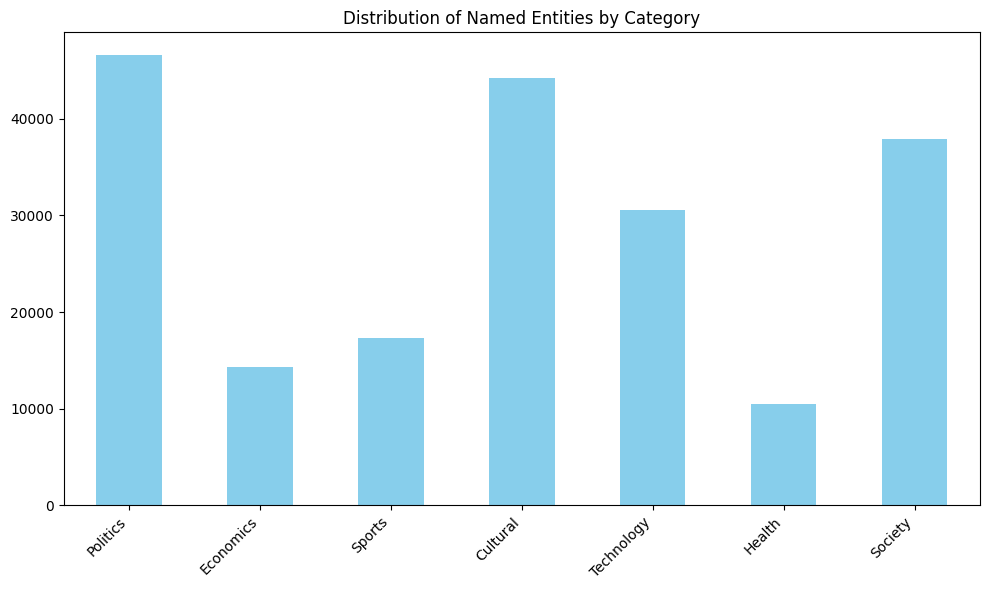

In [ ]:
import matplotlib.pyplot as plt

english_labels = ['Politics', 'Economics', 'Sports', 'Cultural', 'Technology', 'Health', 'Society']
plt.figure(figsize=(10, 6))
ax = entity_results.plot(kind='bar', color='skyblue')
plt.title('Distribution of Named Entities by Category')
plt.xlabel('')
plt.ylabel('')
plt.xticks(range(len(english_labels)), english_labels, rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [ ]:
import pandas as pd

entity_types = ['ORG', 'PER', 'LOC', 'NAT', 'EVE', 'POG']

total_counts = [org_count, per_count, loc_count, nat_count, eve_count, pog_count]

unique_counts = [1663, 3580, 1742, 300, 404, 234]

unique_percentages = [(unique_count / total_count) * 100 for unique_count, total_count in zip(unique_counts, total_counts)]
total_tokens = sum(total_counts)
total_unique_tokens = sum(unique_counts)

data = {
    'Entity Type': entity_types + ['Total'],
    'Total Tokens': total_counts + [total_tokens],
    'Unique Tokens': unique_counts + [total_unique_tokens],
    'Unique Tokens %': unique_percentages + ['']
}

df = pd.DataFrame(data)

print(df)


  Entity Type  Total Tokens  Unique Tokens Unique Tokens %
0         ORG          4406           1663       37.743985
1         PER          8349           3580       42.879387
2         LOC          5883           1742       29.610743
3         NAT           807            300       37.174721
4         EVE          1015            404       39.802956
5         POG           506            234       46.245059
6       Total         20966           7923                


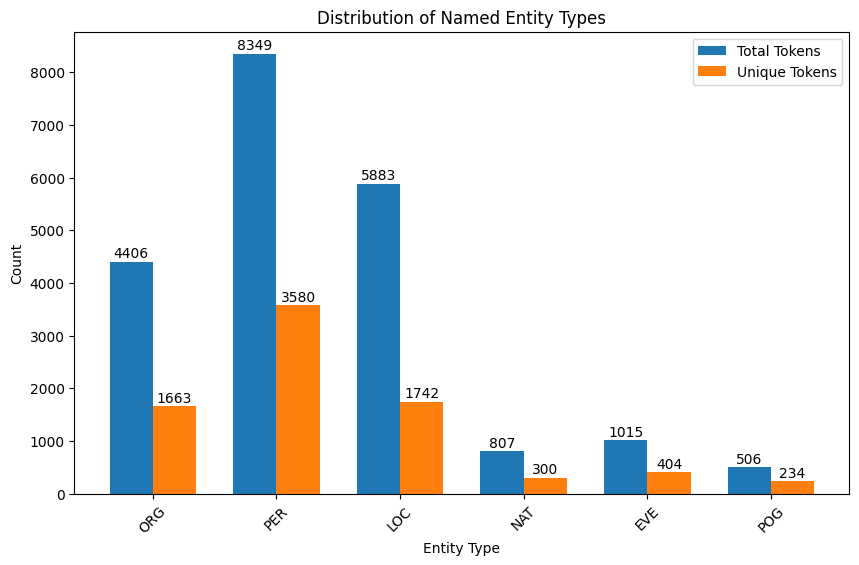

In [ ]:
import matplotlib.pyplot as plt

entity_types = ['ORG', 'PER', 'LOC', 'NAT', 'EVE', 'POG']

total_counts = [org_count, per_count, loc_count, nat_count, eve_count, pog_count]

unique_counts = [1663, 3580, 1742, 300, 404, 234]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

bars1 = ax.bar(entity_types, total_counts, bar_width)
bars2 = ax.bar([x + bar_width for x in range(len(entity_types))], unique_counts, bar_width)

for i, (total_count, unique_count) in enumerate(zip(total_counts, unique_counts)):
    ax.text(i, total_count + 20, str(total_count), ha='center', va='bottom')
    ax.text(i + bar_width, unique_count + 20, str(unique_count), ha='center', va='bottom')

plt.title('Distribution of Named Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.xticks([x + bar_width / 2 for x in range(len(entity_types))], entity_types, rotation=45)
plt.legend(['Total Tokens', 'Unique Tokens'])
plt.show()